Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Defining Hurst Exponent Function

In [ ]:


def hurst_exponent(time_series, max_lag=100):

    # max_lag: The maximum lag (window size) to consider.

    N = len(time_series)
    tau_values = np.arange(2, max_lag)  # Range of tau values (window sizes)
    R_S_values = []

    for tau in tau_values:
        # Split the time series into non-overlapping windows of size tau
        num_segments = N // tau
        RS_tau = []

        for i in range(num_segments):
            segment = time_series[i * tau: (i + 1) * tau]
            mean_segment = np.mean(segment)

            # Calculate Y(t, τ) - cumulative deviation from mean
            Y_t_tau = np.cumsum(segment - mean_segment)

            # Calculate R(τ) - range of Y(t, τ)
            R_tau = np.max(Y_t_tau) - np.min(Y_t_tau)

            # Calculate S(τ) - standard deviation of the segment
            S_tau = np.std(segment)

            # Avoid division by zero
            if S_tau != 0:
                RS_tau.append(R_tau / S_tau)

        # Average R/S values for this tau
        R_S_values.append(np.mean(RS_tau))

    # Perform linear regression on log-log plot
    log_tau = np.log(tau_values)
    log_R_S = np.log(R_S_values)
    slope, _ = np.polyfit(log_tau, log_R_S, 1)

    hurst_exp = slope  # The slope of the line is the Hurst exponent H

    # Plotting the original time series
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(time_series)
    plt.title("Original Time Series")
    plt.xlabel("Time")
    plt.ylabel("Value")

    # Plotting the log-log plot of R/S vs tau
    plt.subplot(1, 2, 2)
    plt.plot(log_tau, log_R_S, 'o', label='Data Points')
    plt.plot(log_tau, slope * log_tau + np.mean(log_R_S - slope * log_tau), 'r--', label=f"Slope = {hurst_exp:.2f}")
    plt.xlabel("log(τ)")
    plt.ylabel("log(R/S)")
    plt.title("Log-Log Plot for Hurst Exponent Estimation")
    plt.legend()

    plt.tight_layout()
    plt.show()

    return hurst_exp


Time Series Data

In [ ]:
# Random Walk (Brownian Motion)
# time series model with a fractal-like structure
#time_series = np.cumsum(np.random.randn(1000))

# White Noise
# A random, uncorrelated sequence. This should give a low fractal dimension since it lacks self-similar structure.
#time_series = np.random.randn(1000)

# Sine Wave (Periodic Signal)
# Generates a regular, repeating signal, which may have a fractal dimension close to 1.

t = np.linspace(0, 10 * np.pi, 1000)
time_series = np.sin(t)

# Loading from a CSV File

#import pandas as pd
#data = pd.read_csv("Gold.csv")
#data.head()
#time_series = data["VALUE"].values


#Electric_Production from keggle
#Daily gold fixing price (10:30 am London time)
# in London Bullion Market in US dollars per Troy ounce
# from January 3, 1995 to November 10, 2016 from website of texas university

using the function to calculate the dimension

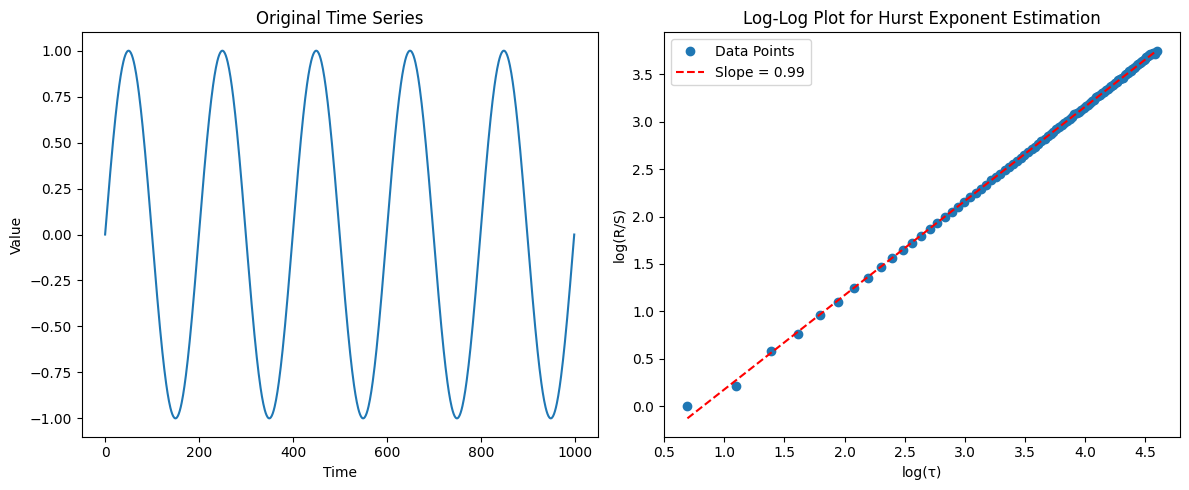

Estimated Hurst Exponent: 0.9941148007467765


In [ ]:
hurst = hurst_exponent(time_series, max_lag=100)
print("Estimated Hurst Exponent:", hurst)